In [1]:
from problem import mlp_problem
from environment import Environment
import torch 
from environment import eval_handcrafted_optimizer
import stable_baselines3
from train_agent import eval_agent
import numpy as np
import matplotlib.pyplot as plt

/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(tensor([[-0.7735, -1.3766],
        [ 3.0838,  0.5563],
        [ 2.3465,  0.4142],
        [-0.0695, -0.1835],
        [ 1.6413,  3.1309],
        [-1.1283, -1.7895],
        [ 2.1099, -0.2431],
        [ 1.6654,  2.3277],
        [ 2.5153, -0.2478],
        [-1.2408, -1.3485],
        [ 0.7930,  0.4268],
        [ 0.6132,  1.9674],
        [-0.3857, -1.2054],
        [-1.0357, -1.3238],
        [-0.3900, -0.2601],
        [ 0.1605,  2.3817],
        [ 2.8946,  1.9928],
        [-0.8222, -1.5128],
        [-0.1951,  1.2633],
        [-0.4863, -1.3408],
        [-1.1705, -1.8430],
        [ 4.4214, -1.3448],
        [ 1.9763,  0.4609],
        [-0.7966,  1.6073],
        [ 0.5492,  1.8044],
        [-0.3366, -0.9205],
        [ 0.4206, -1.4490],
        [-1.3827,  0.0348],
        [-0.8571, -1.0765],
        [ 1.5168,  1.4323],
        [-0.0605, -1.3233],
        [ 4.3395, -0.2997],
        [ 1.8578,  0.4549],
        [ 0.4220,  0.5954],
        [ 3.1682, -0.1127],
        [-0.7678, -

/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/stable_baselines3/common/env_checker.py:130: UserWarning: Your observation  has an unconventional shape (neither an image, nor a 1D vector). We recommend you to flatten the observation to have only a 1D vector or use a custom policy to properly process the data.
  warnings.warn(
/home/tidianes/miniconda3/envs/tid_env/lib/python3.10/site-packages/stable_baselines3/ppo/ppo.py:151: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 2`, after every 0 untruncated mini-batches, there will be a truncated mini-batch of size 2
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=2 and n_envs=1)
  warnings.warn(


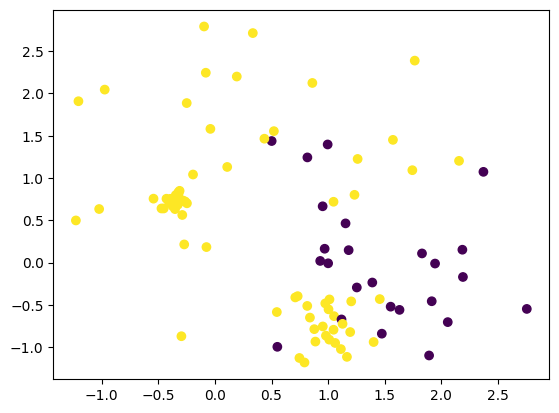

In [2]:
MLP_problem = mlp_problem()
#plot the dataset

x,y = MLP_problem["dataset"]
plt.scatter(x[:,0],x[:,1],c=y)

In [3]:
#show the model
MLP_problem["model0"]

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [4]:
#show the objective function
MLP_problem["obj_function"](MLP_problem["model0"])

tensor(0.8513, grad_fn=<AddBackward0>)

In [5]:
# define the problem list
nb_problems = 100
train_problem_list = [mlp_problem() for _ in range(nb_problems)]
test_problem_list = [mlp_problem()]
# number of steps in each episode
model_training_steps = 40
optimizer_class_list=[torch.optim.SGD, torch.optim.Adam]
history_len = 25

train_env = Environment(problem_list = train_problem_list,
                num_steps = model_training_steps, 
                history_len = history_len, 
                optimizer_class_list = optimizer_class_list
                )
test_env = Environment(problem_list = test_problem_list,
                num_steps = model_training_steps, 
                history_len = history_len, 
                optimizer_class_list = optimizer_class_list,
                do_init_weights = False
                )

policy = stable_baselines3.PPO('MlpPolicy', train_env, n_steps=2, verbose=0,
                                            tensorboard_log='tb_logs/norm')


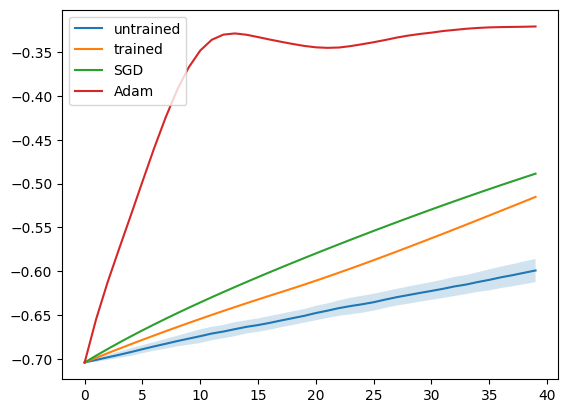

In [6]:
#evaluate trained and untrained agent

actions, rewards = eval_agent(test_env, policy, num_episodes=40, num_steps=model_training_steps)

plt.plot(np.mean(rewards, axis=0), label='untrained')
plt.fill_between(np.arange(len(rewards[0])), np.mean(rewards, axis=0) - np.std(rewards, axis=0), np.mean(rewards, axis=0) + np.std(rewards, axis=0), alpha=0.2)

agent_training_timesteps = 10000
policy.learn(total_timesteps=agent_training_timesteps)


actions, rewards = eval_agent(test_env, policy, num_episodes=40, num_steps=model_training_steps)

plt.plot(np.mean(rewards, axis=0), label='trained')
plt.fill_between(np.arange(len(rewards[0])), np.mean(rewards, axis=0) - np.std(rewards, axis=0), np.mean(rewards, axis=0) + np.std(rewards, axis=0), alpha=0.2)


#evaluate the handcrafted optimizers
rewards_sgd = eval_handcrafted_optimizer(test_problem_list, torch.optim.SGD, model_training_steps, do_init_weights=False)
rewards_adam = eval_handcrafted_optimizer(test_problem_list, torch.optim.Adam, model_training_steps, do_init_weights=False)
plt.plot(np.mean(rewards_sgd,axis=0), label="SGD")
plt.plot(np.mean(rewards_adam,axis=0), label="Adam")
plt.legend()


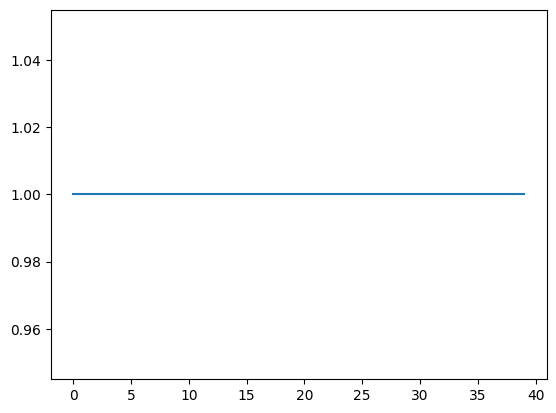

In [8]:
plt.plot(np.mean(actions, axis=0), label='actions')

In [9]:
actions

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])